In [1]:
import numpy as np
import cv2
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import os



In [2]:
# Function to extract HOG features from an image
def extract_features(image):
    resized_image = cv2.resize(image, (64, 64))
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    features, hog_image = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                               cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')
    return features



In [3]:
# Load images and extract features
def load_data(directory):
    X = []
    y = []
    for filename in os.listdir(directory):
        if filename.startswith("cat"):
            label = 0
        else:
            label = 1
        image = cv2.imread(os.path.join(directory, filename))
        features = extract_features(image)
        X.append(features)
        y.append(label)
    return np.array(X), np.array(y)

In [8]:
# Load dataset
X_cats, y_cats = load_data("C:\\Users\\User\\OneDrive\\Desktop\\train\\cats")
X_dogs, y_dogs = load_data("C:\\Users\\User\\OneDrive\\Desktop\\train\\dogs")



In [9]:
# Concatenate cat and dog features
X = np.concatenate((X_cats, X_dogs))
y = np.concatenate((y_cats, y_dogs))



In [10]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [11]:
# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)



SVC(kernel='linear')

In [12]:
# Predict
y_pred = svm_model.predict(X_test)



In [13]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6375


In [14]:
import matplotlib.pyplot as plt

# Function to visualize HOG features
def visualize_hog(image):
    resized_image = cv2.resize(image, (64, 64))
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    features, hog_image = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                               cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

    ax1.axis('off')
    ax1.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    ax1.set_title('Original Image')

    ax2.axis('off')
    ax2.imshow(hog_image, cmap=plt.cm.gray)
    ax2.set_title('HOG Features')
    
    plt.show()




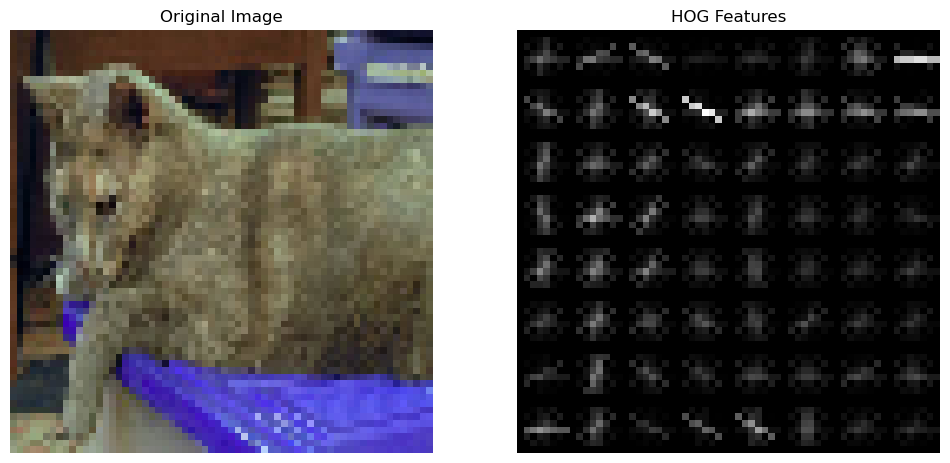

In [15]:
# Load an example image
example_image = cv2.imread("C:\\Users\\User\\OneDrive\\Desktop\\train\\cats\\cat.220.jpg")

# Visualize HOG features for the example image
visualize_hog(example_image)

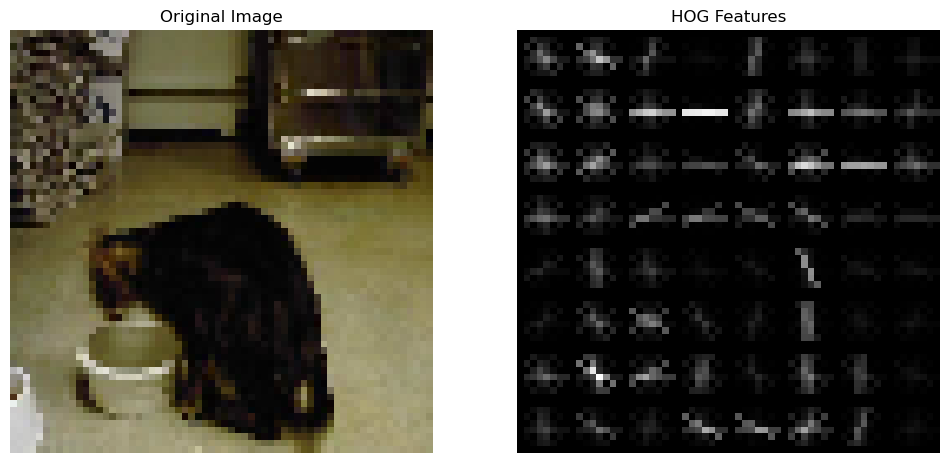

In [16]:
# Load an example image
example_image = cv2.imread("C:\\Users\\User\\OneDrive\\Desktop\\train\\cats\\cat.221.jpg")

# Visualize HOG features for the example image
visualize_hog(example_image)

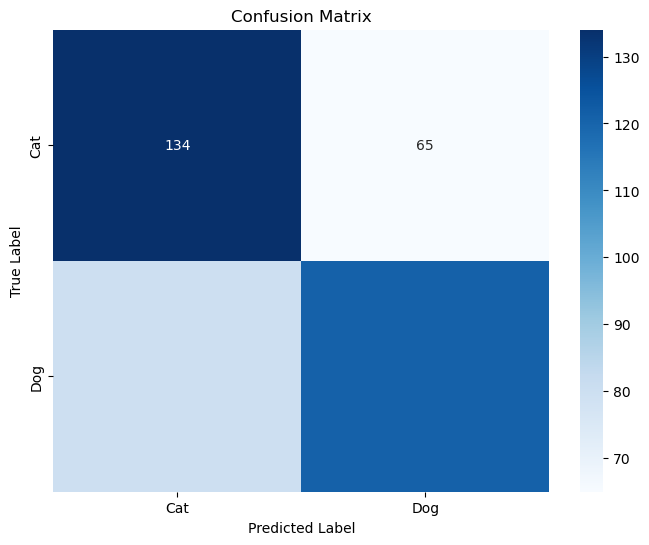

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Cat", "Dog"], yticklabels=["Cat", "Dog"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
